In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix




In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
print("First 5 Rows:")
print(df.head())

First 5 Rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  

In [5]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [6]:
print(" Target Variable Distribution:")
print(df['Exited'].value_counts(normalize=True))  

 Target Variable Distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


In [7]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min  

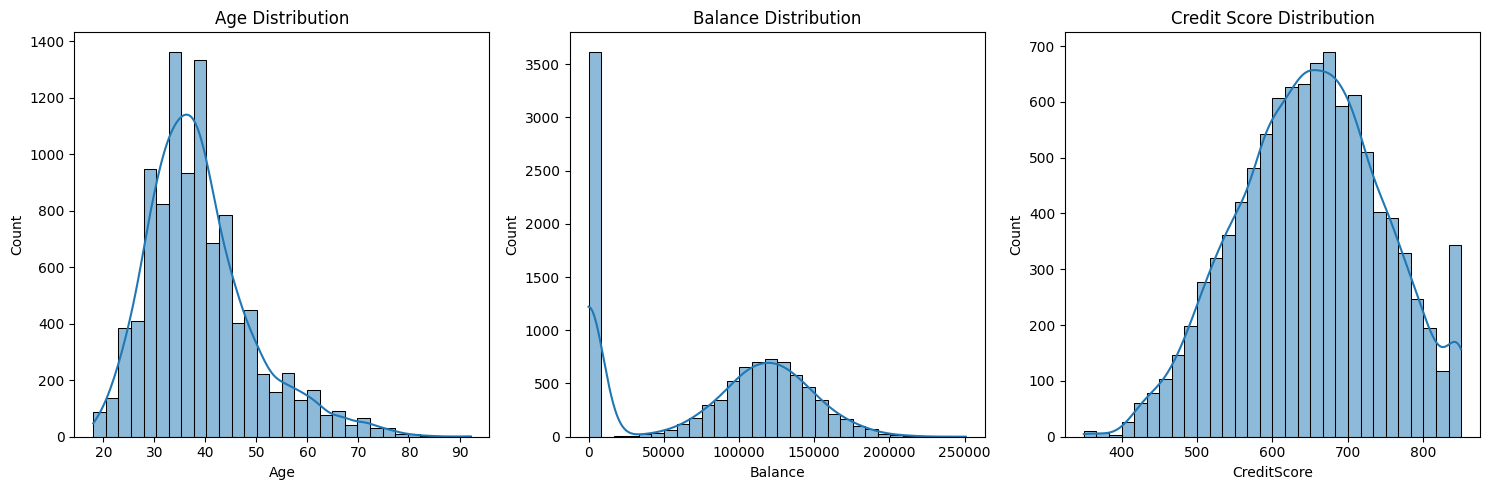

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Balance Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Credit Score Distribution')

plt.tight_layout()
plt.show()

In [9]:
df['HasBalance'] = (df['Balance'] > 0).astype(int)
print(df['HasBalance'].value_counts(normalize=True))

HasBalance
1    0.6383
0    0.3617
Name: proportion, dtype: float64


In [10]:
df.groupby('HasBalance')['Exited'].mean()

HasBalance
0    0.138236
1    0.240796
Name: Exited, dtype: float64

In [11]:
#"We created a binary feature to indicate if a customer holds any balance. 
# Analysis shows that customers with balances churn at almost double the rate compared to those without balances. 
# This makes 'HasBalance' a significant predictor and highlights where targeted customer retention efforts could be focused."

C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_13236\1844079989.py:15: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_13236\1844079989.py:15: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_13236\1844079989.py:15: UserWarning: Glyph 128682 (\N{DOOR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Rami Alrwais\Desktop\training\jupyter\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Rami Alrwais\Desktop\training\jupyter\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128100 (\N{BUST IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c

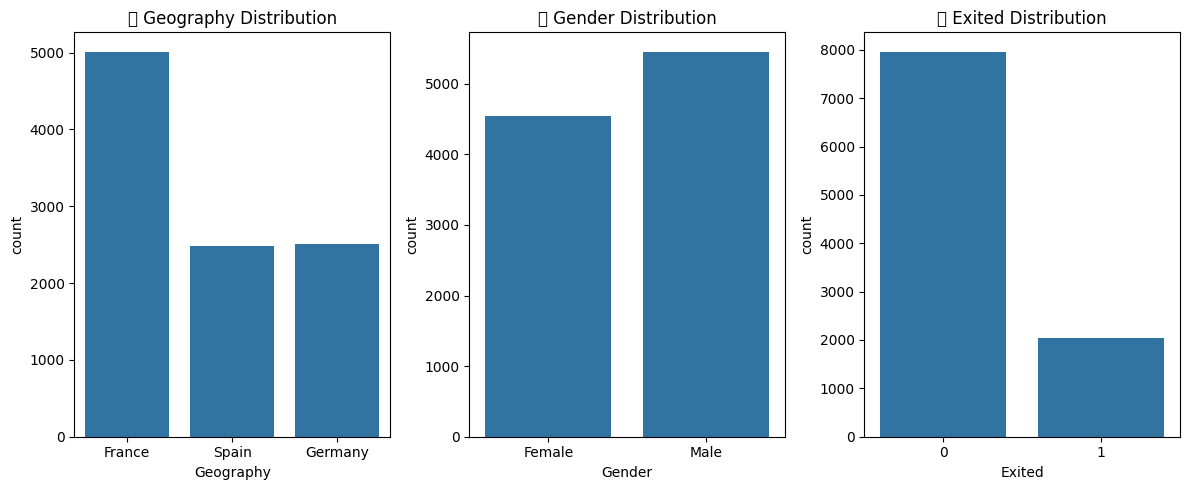

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='Geography', data=df)
plt.title('🌍 Geography Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Gender', data=df)
plt.title('👤 Gender Distribution')

plt.subplot(1, 3, 3)
sns.countplot(x='Exited', data=df)
plt.title('🚪 Exited Distribution')

plt.tight_layout()
plt.show()

In [13]:
categorical_cols = ['Geography', 'Gender']
for col in categorical_cols:
    print(f"\n🔡 Unique values in '{col}': {df[col].unique()}")

df = pd.get_dummies(df, columns=['Geography'], drop_first=True)


🔡 Unique values in 'Geography': ['France' 'Spain' 'Germany']

🔡 Unique values in 'Gender': ['Female' 'Male']


In [14]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})


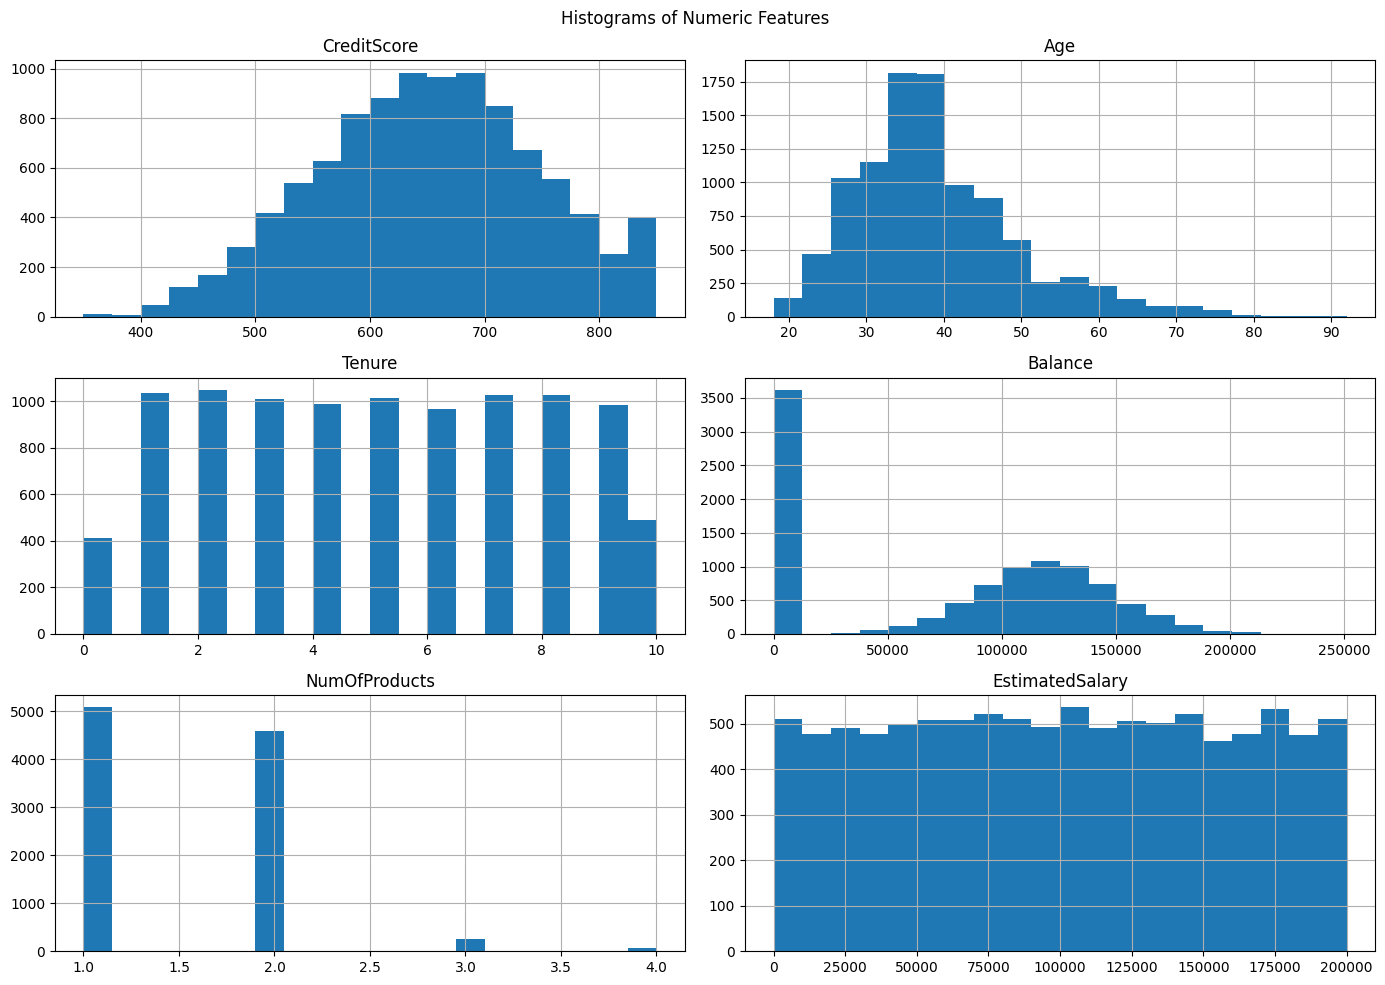

In [15]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

df[num_cols].hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()



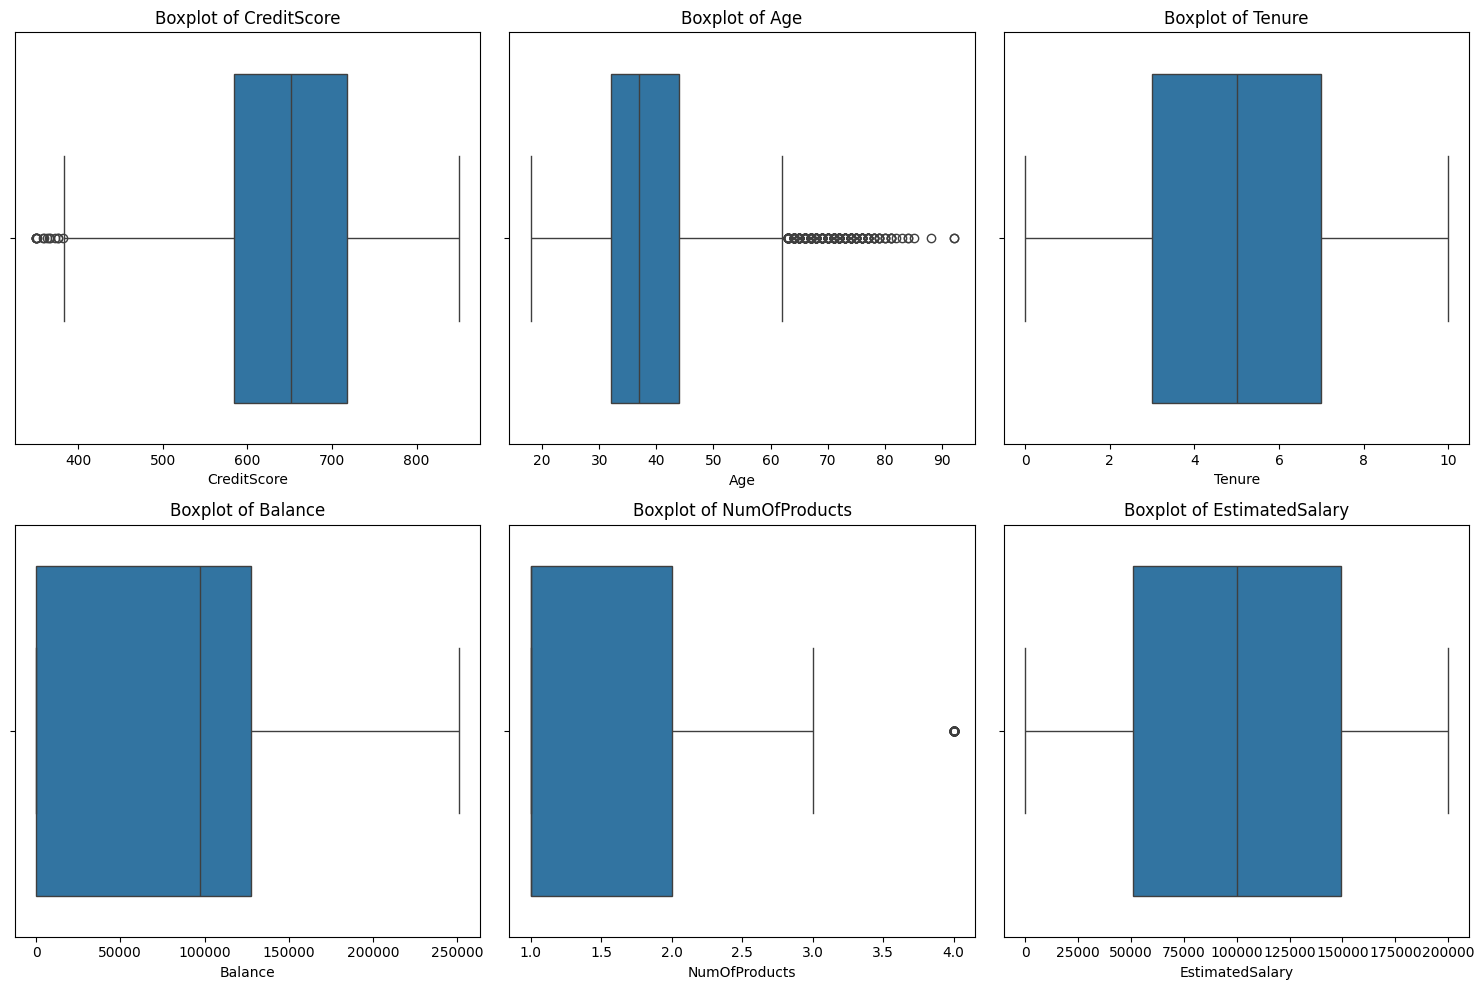

In [16]:
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

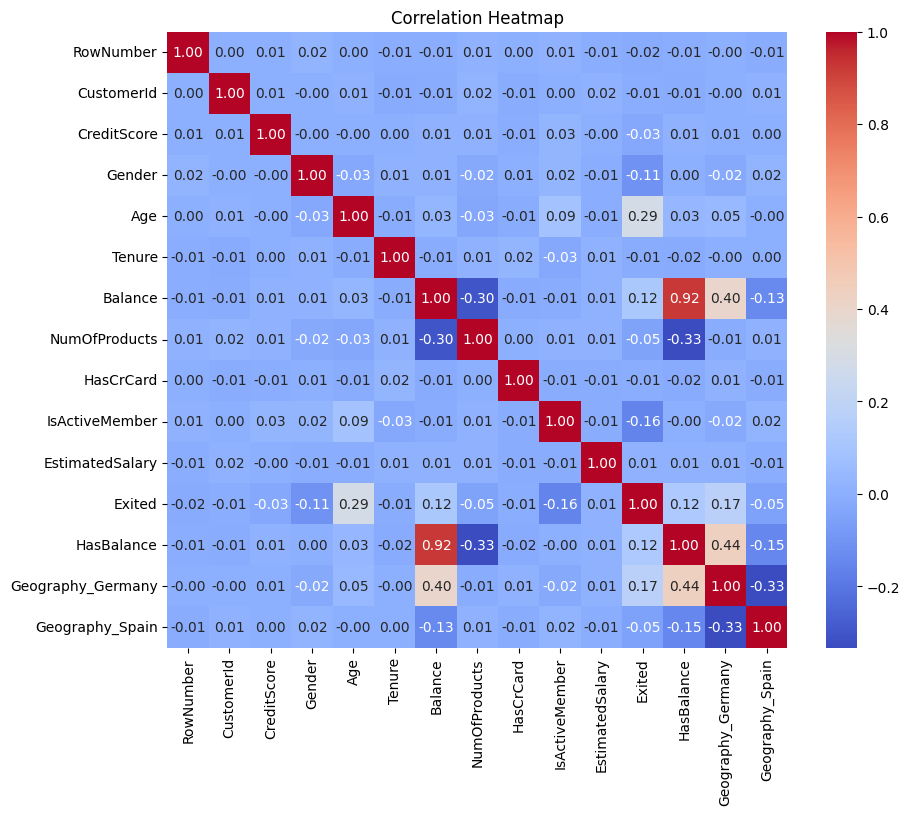

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [18]:
df_clean = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [19]:
print("\n Preprocessed Data Sample:")
print(df_clean.head())

print("\n Final Columns:")
print(df_clean.columns)


 Preprocessed Data Sample:
   CreditScore  Gender  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619       0   42       2       0.00              1          1   
1          608       0   41       1   83807.86              1          0   
2          502       0   42       8  159660.80              3          1   
3          699       0   39       1       0.00              2          0   
4          850       0   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  HasBalance  Geography_Germany  \
0               1        101348.88       1           0              False   
1               1        112542.58       0           1              False   
2               0        113931.57       1           1              False   
3               0         93826.63       0           0              False   
4               1         79084.10       0           1              False   

   Geography_Spain  
0            False  
1         

In [20]:
def sigmoid(h):
    return 1/(1+np.exp(-h))
def cross_entropy(y, p_hat):
    epsilon = 1e-10  
    p_hat = np.clip(p_hat, epsilon, 1 - epsilon)
    return -(1/len(y)) * np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [21]:
class logisticRegression():
    def __init__(self, thresh=0.5, seed=None):
        self.W = None
        self.b = None
        self.thresh = thresh
        if seed is not None:
            np.random.seed(seed)
        
    def fit(self, X, y, eta=1e-3, epochs=1000, show_curve=True):
        epochs = int(epochs)
        N, D = X.shape

        # Initialize weights and bias
        self.W = np.random.randn(D) * 0.01
        self.b = float(np.random.randn() * 0.01)

        J = np.zeros(epochs)

        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)
            self.W -= eta * (1/N) * X.T @ (p_hat - y)
            self.b -= eta * (1/N) * np.sum(p_hat - y)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("Epochs")
            plt.ylabel("Loss (Cross Entropy)")
            plt.title("Training Loss Curve")
            plt.show()

    def __forward__(self, X):
        return sigmoid(X @ self.W + self.b)
        
    def predict(self, X):
        return (self.__forward__(X) >= self.thresh).astype(np.int32)

In [22]:
def main():
    features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 
                'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'HasBalance']

    X = df[features].values
    y = df['Exited'].values

    X = np.array(X, dtype=float)
    y = np.array(y, dtype=int)

    numeric_cols = [0, 2, 3, 4, 5, 8]  # indexes of numeric columns to scale

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    log_reg = logisticRegression(seed=42)  # instantiate model here

    # Undersample majority class in training data to get 60/40 ratio
    train_data = np.hstack((X_train, y_train.reshape(-1, 1)))
    majority_class = train_data[train_data[:, -1] == 0]
    minority_class = train_data[train_data[:, -1] == 1]
    n_minority = len(minority_class)
    n_majority = int(n_minority * (60 / 40))
    np.random.seed(42)
    majority_downsampled = majority_class[np.random.choice(majority_class.shape[0], n_majority, replace=False)]
    balanced_train = np.vstack((majority_downsampled, minority_class))
    np.random.shuffle(balanced_train)
    X_train = balanced_train[:, :-1]
    y_train = balanced_train[:, -1]

    # Scale numeric columns after undersampling
    scaler = StandardScaler()
    X_train[:, numeric_cols] = scaler.fit_transform(X_train[:, numeric_cols])
    X_test[:, numeric_cols] = scaler.transform(X_test[:, numeric_cols])

    log_reg.fit(X_train, y_train, eta=1e-2, epochs=30000)

    y_hat_train = log_reg.predict(X_train)
    y_hat_test = log_reg.predict(X_test)

    print(f"Training Accuracy: {accuracy(y_train, y_hat_train):.4f}")
    print(f"Test Accuracy: {accuracy(y_test, y_hat_test):.4f}")

    print("\nConfusion Matrix (Test):")
    print(confusion_matrix(y_test, y_hat_test))

    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_hat_test, digits=4))
    

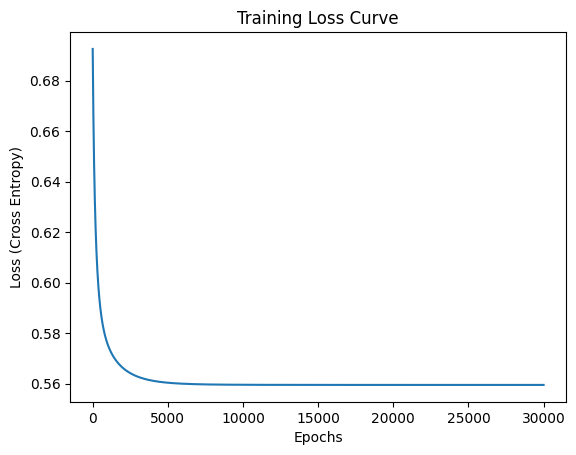

Training Accuracy: 0.7163
Test Accuracy: 0.7785

Confusion Matrix (Test):
[[1325  268]
 [ 175  232]]

Classification Report (Test):
              precision    recall  f1-score   support

           0     0.8833    0.8318    0.8568      1593
           1     0.4640    0.5700    0.5116       407

    accuracy                         0.7785      2000
   macro avg     0.6737    0.7009    0.6842      2000
weighted avg     0.7980    0.7785    0.7865      2000



In [23]:
if __name__ == "__main__":
    main()